In [67]:
# lightenplot/themes.py
"""Theme management for LightenPlot."""

import matplotlib.pyplot as plt
from abc import ABC, abstractmethod


class Theme(ABC):
    """Abstract base class for themes."""
    
    @abstractmethod
    def apply(self, ax, fig):
        """Apply theme to axes and figure."""
        pass


class DefaultTheme(Theme):
    """Default clean theme."""
    
    def apply(self, ax, fig):
        """Apply default theme settings."""
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(0.5)
        ax.spines['bottom'].set_linewidth(0.5)
        ax.tick_params(labelsize=10)
        fig.patch.set_facecolor('white')


class DarkTheme(Theme):
    """Dark mode theme."""
    
    def apply(self, ax, fig):
        """Apply dark theme settings."""
        fig.patch.set_facecolor('#1e1e1e')
        ax.set_facecolor('#2d2d2d')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_color('white')
        ax.spines['bottom'].set_color('white')
        ax.tick_params(colors='white', labelsize=10)
        ax.xaxis.label.set_color('white')
        ax.yaxis.label.set_color('white')
        ax.title.set_color('white')


class MinimalTheme(Theme):
    """Minimal theme with no spines."""
    
    def apply(self, ax, fig):
        """Apply minimal theme settings."""
        for spine in ax.spines.values():
            spine.set_visible(False)
        ax.tick_params(left=False, bottom=False)
        ax.grid(True, alpha=0.2, linestyle='--')
        fig.patch.set_facecolor('white')


class ColorfulTheme(Theme):
    """Vibrant, colorful theme."""
    
    def apply(self, ax, fig):
        """Apply colorful theme settings."""
        fig.patch.set_facecolor('#f0f8ff')
        ax.set_facecolor('#ffffff')
        ax.spines['top'].set_color('#ff6b6b')
        ax.spines['right'].set_color('#4ecdc4')
        ax.spines['left'].set_color('#45b7d1')
        ax.spines['bottom'].set_color('#f9ca24')
        ax.spines['top'].set_linewidth(2)
        ax.spines['right'].set_linewidth(2)
        ax.spines['left'].set_linewidth(2)
        ax.spines['bottom'].set_linewidth(2)
        ax.tick_params(labelsize=10)


class ThemeManager:
    """
    Singleton-like manager for themes.
    Demonstrates polymorphism through different theme implementations.
    """
    
    _themes = {
        'default': DefaultTheme(),
        'dark': DarkTheme(),
        'minimal': MinimalTheme(),
        'colorful': ColorfulTheme()
    }
    
    @classmethod
    def get_theme(cls, name):
        """
        Get theme by name.
        
        Args:
            name: Theme name ('default', 'dark', 'minimal', 'colorful')
            
        Returns:
            Theme instance
            
        Raises:
            ValueError: If theme name not found
        """
        if name not in cls._themes:
            raise ValueError(f"Theme '{name}' not found. Available: {list(cls._themes.keys())}")
        return cls._themes[name]
    
    @classmethod
    def register_theme(cls, name, theme):
        """
        Register a custom theme.
        
        Args:
            name: Theme name
            theme: Theme instance (must inherit from Theme)
        """
        if not isinstance(theme, Theme):
            raise TypeError("Theme must inherit from Theme base class")
        cls._themes[name] = theme
    
    @classmethod
    def list_themes(cls):
        """Return list of available theme names."""
        return list(cls._themes.keys())
    
    def __repr__(self):
        return f"ThemeManager(themes={self.list_themes()})"

In [68]:
import sys
import os

# Add the parent directory to Python path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))

# Now import should work
import lightenplot as lp

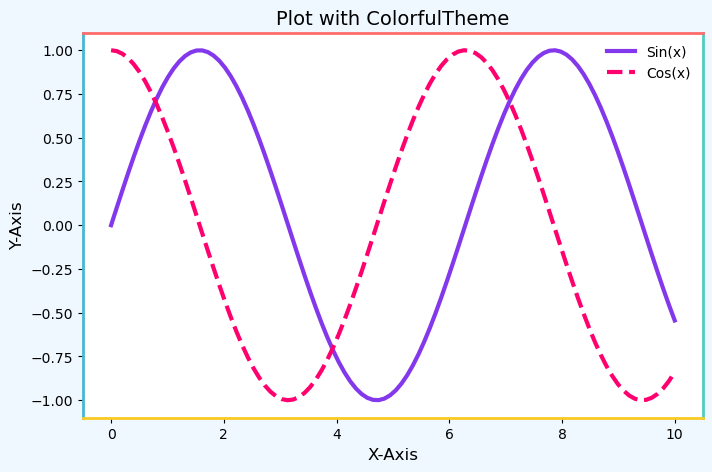

In [69]:
import matplotlib.pyplot as plt
import numpy as np


# 1. Prepare Data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# 2. Create Figure and Axes
fig, ax = plt.subplots(figsize=(8, 5))

# 3. Get the Colorful Theme from the Manager
# Note: ThemeManager.get_theme() requires the manager class to be defined.

class Theme:
    def apply(self, ax, fig): pass
class ColorfulTheme(Theme):
    def apply(self, ax, fig):
        fig.patch.set_facecolor('#f0f8ff')
        ax.set_facecolor('#ffffff')
        ax.spines['top'].set_color('#ff6b6b')
        ax.spines['right'].set_color('#4ecdc4')
        ax.spines['left'].set_color('#45b7d1')
        ax.spines['bottom'].set_color('#f9ca24')
        ax.spines['top'].set_linewidth(2)
        ax.spines['right'].set_linewidth(2)
        ax.spines['left'].set_linewidth(2)
        ax.spines['bottom'].set_linewidth(2)
        ax.tick_params(labelsize=10)

class ThemeManager:
    _themes = {'colorful': ColorfulTheme()}
    @classmethod
    def get_theme(cls, name):
        return cls._themes[name]
# --- End of Dummy Setup ---


try:
    colorful_theme = ThemeManager.get_theme('colorful')

    # 4. Apply the Theme
    colorful_theme.apply(ax, fig)

    # 5. Plot the Data
    ax.plot(x, y1, label='Sin(x)', color='#8338ec', linewidth=3)
    ax.plot(x, y2, label='Cos(x)', color='#ff006e', linestyle='--', linewidth=3)

    # 6. Add Titles/Labels
    ax.set_title('Plot with ColorfulTheme', fontsize=14, color='black')
    ax.set_xlabel('X-Axis', fontsize=12, color='black')
    ax.set_ylabel('Y-Axis', fontsize=12, color='black')
    ax.legend(frameon=False) # Turn off legend border for a cleaner look

    # 7. Show the Plot
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}. Make sure ThemeManager and ColorfulTheme are properly defined.")



LIGHTENPLOT THEMES DEMONSTRATION

Available themes: ['default', 'dark', 'minimal', 'colorful']


1. DEFAULT THEME
------------------------------------------------------------
Clean, minimalist look with only left and bottom borders



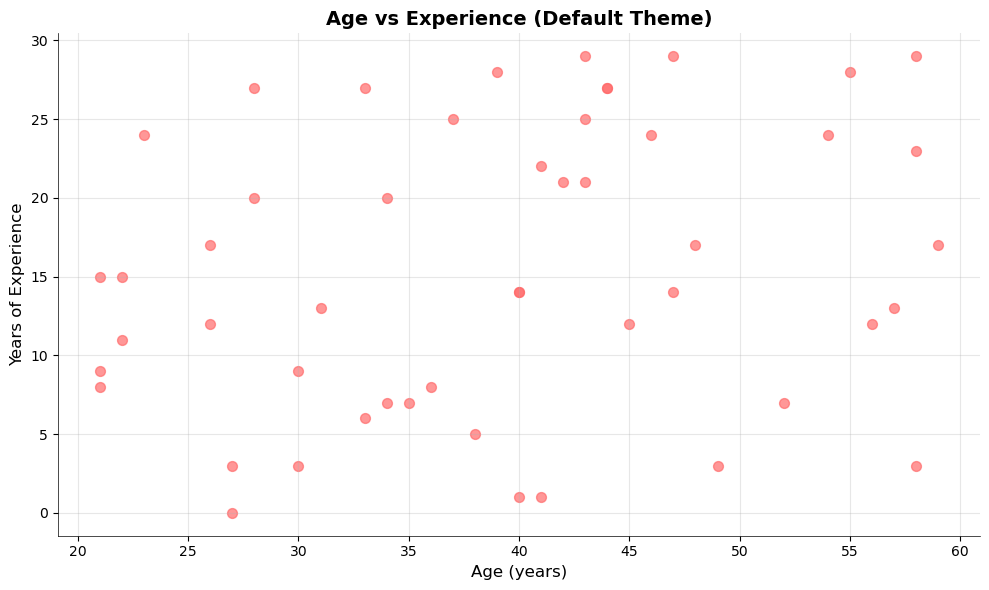

✓ Applied default theme
  - White background
  - Thin left & bottom borders only
  - Clean and professional


In [70]:
import lightenplot as lp
import pandas as pd
import numpy as np

# Sample data
np.random.seed(42)
data = pd.DataFrame({
    'age': np.random.randint(20, 60, 50),
    'experience': np.random.randint(0, 30, 50),
    'salary': np.random.randint(30000, 120000, 50)
})

print("=" * 60)
print("LIGHTENPLOT THEMES DEMONSTRATION")
print("=" * 60)

# Show available themes
print(f"\nAvailable themes: {lp.ThemeManager.list_themes()}")
print()

# 1. DEFAULT THEME

print("\n1. DEFAULT THEME")
print("-" * 60)
print("Clean, minimalist look with only left and bottom borders")
print()

lp.scatter(data, x='age', y='experience', color='#FF6B6B') \
  .set_title('Age vs Experience (Default Theme)') \
  .set_labels('Age (years)', 'Years of Experience') \
  .apply_theme('default') \
  .show()

print("✓ Applied default theme")
print("  - White background")
print("  - Thin left & bottom borders only")
print("  - Clean and professional")




2. DARK THEME
------------------------------------------------------------
Night-friendly with dark backgrounds and white text



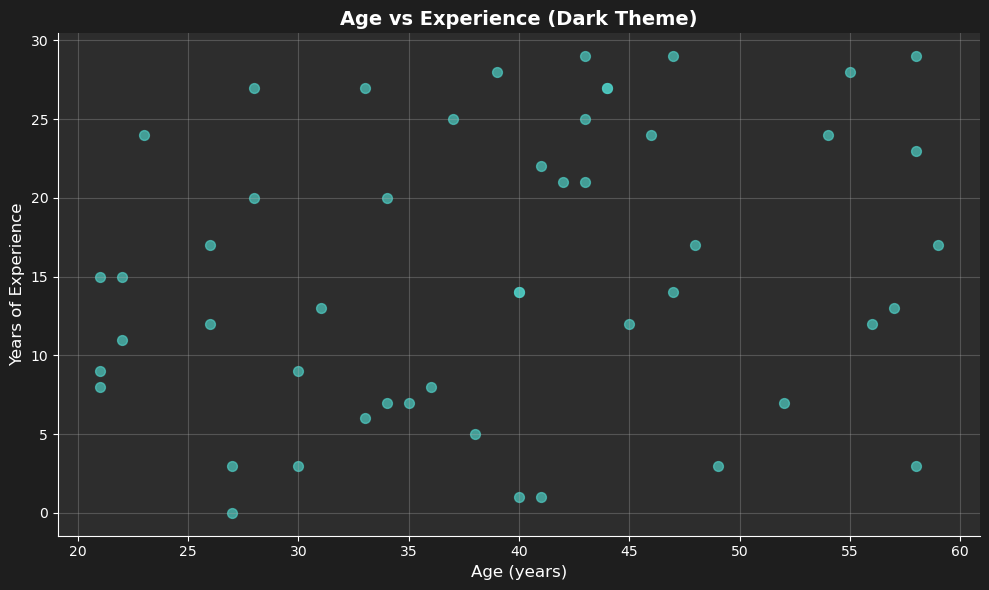

✓ Applied dark theme
  - Dark gray background (#1e1e1e)
  - White text and borders
  - Easy on the eyes at night


In [71]:
# 2. DARK THEME

print("\n2. DARK THEME")
print("-" * 60)
print("Night-friendly with dark backgrounds and white text")
print()

lp.scatter(data, x='age', y='experience', color='#4ECDC4') \
  .set_title('Age vs Experience (Dark Theme)') \
  .set_labels('Age (years)', 'Years of Experience') \
  .apply_theme('dark') \
  .show()

print("✓ Applied dark theme")
print("  - Dark gray background (#1e1e1e)")
print("  - White text and borders")
print("  - Easy on the eyes at night")


3. MINIMAL THEME
------------------------------------------------------------
Ultra-minimal with no borders, only subtle grid



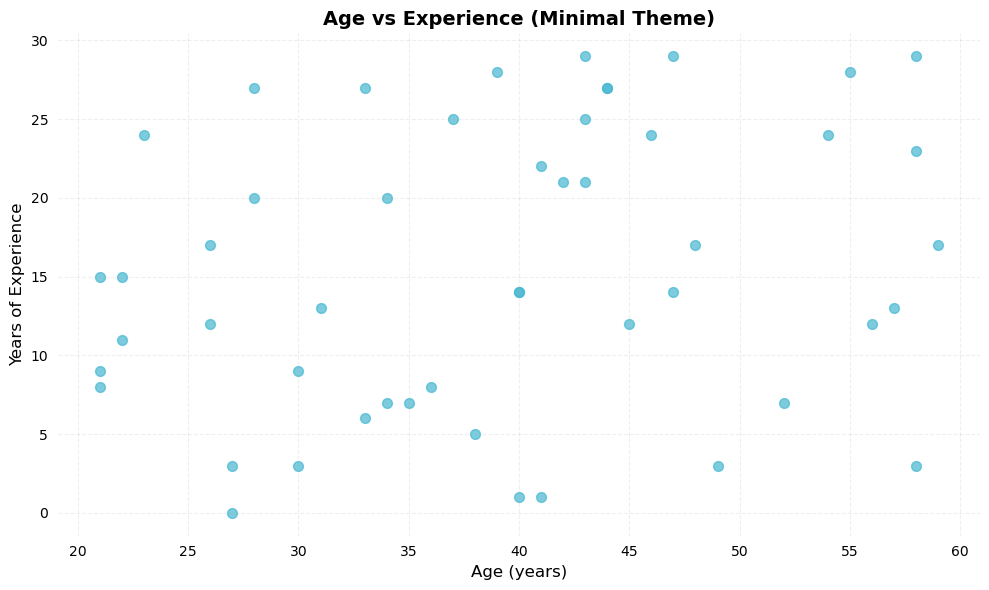

✓ Applied minimal theme
  - No visible borders
  - No tick marks
  - Subtle dashed grid lines
  - Data-focused aesthetic


In [72]:
# 3. MINIMAL THEME

print("\n3. MINIMAL THEME")
print("-" * 60)
print("Ultra-minimal with no borders, only subtle grid")
print()

lp.scatter(data, x='age', y='experience', color='#45B7D1') \
  .set_title('Age vs Experience (Minimal Theme)') \
  .set_labels('Age (years)', 'Years of Experience') \
  .apply_theme('minimal') \
  .show()

print("✓ Applied minimal theme")
print("  - No visible borders")
print("  - No tick marks")
print("  - Subtle dashed grid lines")
print("  - Data-focused aesthetic")



4. COLORFUL THEME
------------------------------------------------------------
Vibrant, playful with multi-colored borders



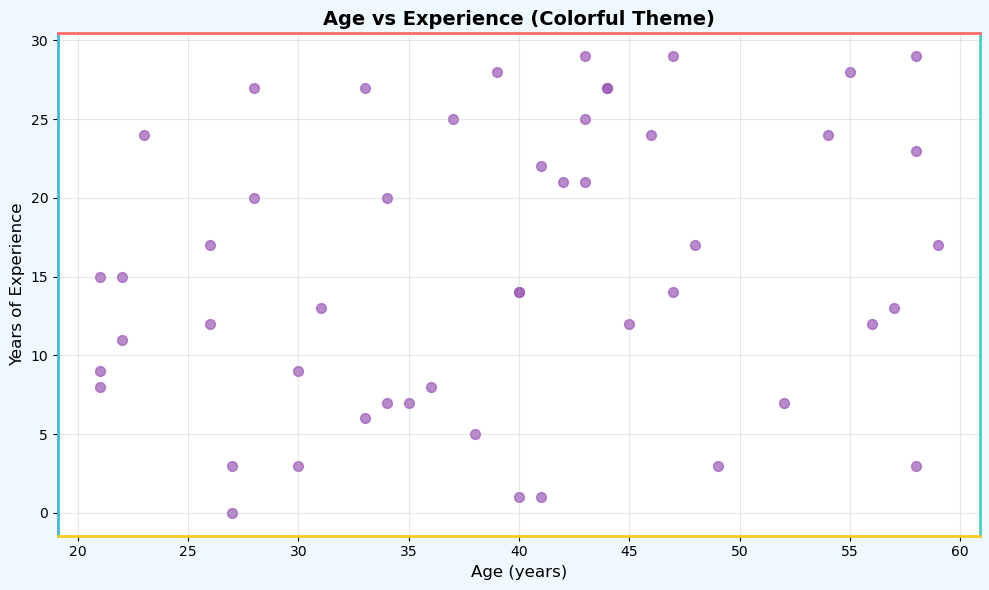

✓ Applied colorful theme
  - Light blue background (#f0f8ff)
  - Each border has different color:
    • Top: Red (#ff6b6b)
    • Right: Turquoise (#4ecdc4)
    • Left: Blue (#45b7d1)
    • Bottom: Yellow (#f9ca24)
  - Thick borders (2pt)
  - Fun and eye-catching!


In [73]:
# 4. COLORFUL THEME

print("\n4. COLORFUL THEME")
print("-" * 60)
print("Vibrant, playful with multi-colored borders")
print()

lp.scatter(data, x='age', y='experience', color='#9B59B6') \
  .set_title('Age vs Experience (Colorful Theme)') \
  .set_labels('Age (years)', 'Years of Experience') \
  .apply_theme('colorful') \
  .show()

print("✓ Applied colorful theme")
print("  - Light blue background (#f0f8ff)")
print("  - Each border has different color:")
print("    • Top: Red (#ff6b6b)")
print("    • Right: Turquoise (#4ecdc4)")
print("    • Left: Blue (#45b7d1)")
print("    • Bottom: Yellow (#f9ca24)")
print("  - Thick borders (2pt)")
print("  - Fun and eye-catching!")




BONUS: Line Plots with Different Themes

Line plot with MINIMAL theme:


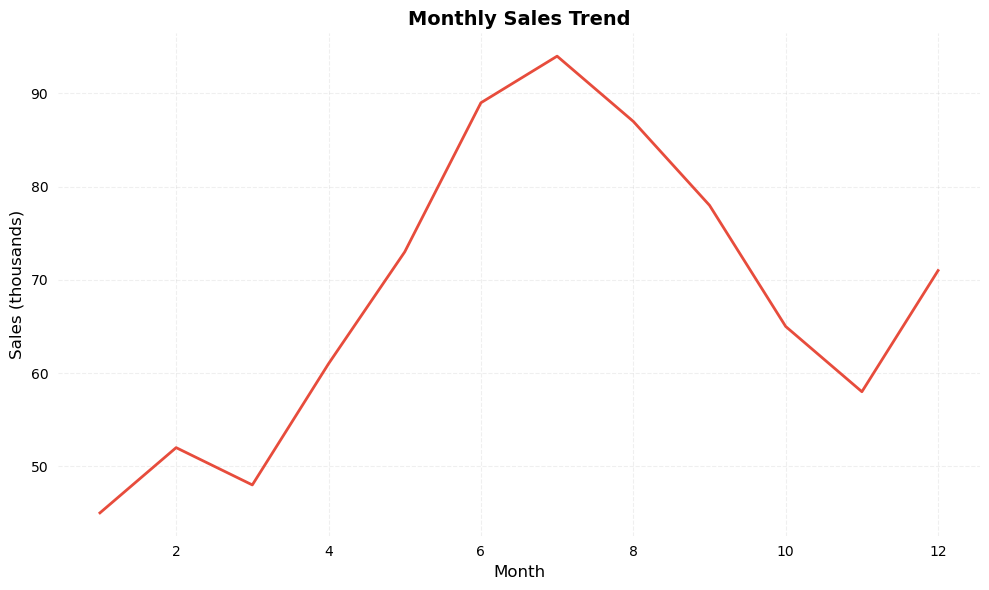


Line plot with COLORFUL theme:


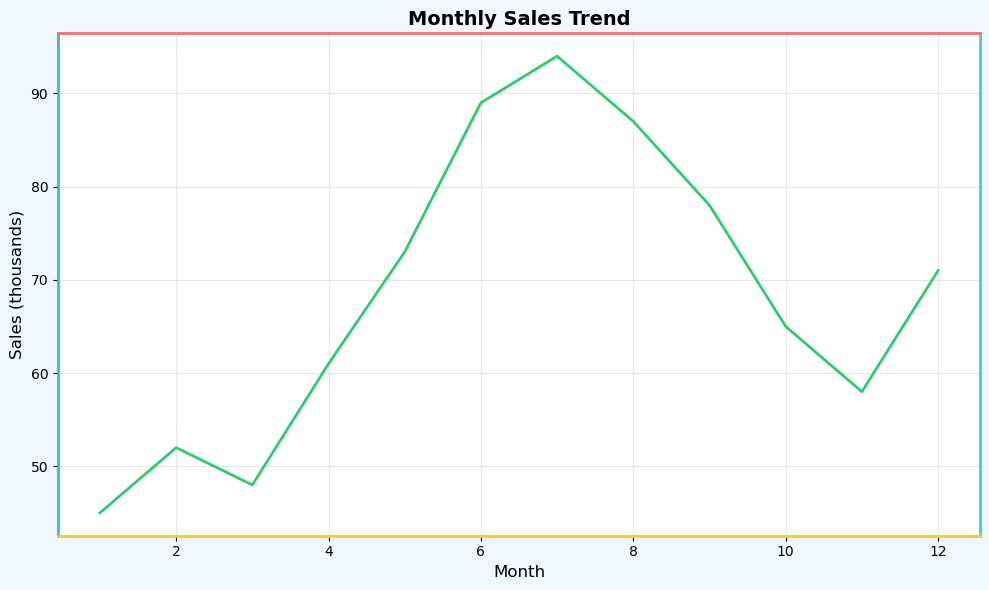

LinePlot(theme='colorful', title='Monthly Sales Trend')

In [74]:
# BONUS: LINE PLOT COMPARISON

print("\n" + "=" * 60)
print("BONUS: Line Plots with Different Themes")
print("=" * 60)

# Create time series data
time_data = pd.DataFrame({
    'month': range(1, 13),
    'sales': [45, 52, 48, 61, 73, 89, 94, 87, 78, 65, 58, 71]
})

print("\nLine plot with MINIMAL theme:")
lp.line(time_data, x='month', y='sales', color='#E74C3C') \
  .set_title('Monthly Sales Trend') \
  .set_labels('Month', 'Sales (thousands)') \
  .apply_theme('minimal') \
  .show()

print("\nLine plot with COLORFUL theme:")
lp.line(time_data, x='month', y='sales', color='#2ECC71') \
  .set_title('Monthly Sales Trend') \
  .set_labels('Month', 'Sales (thousands)') \
  .apply_theme('colorful') \
  .show()

In [75]:
# THEME COMPARISON SUMMARY

print("\n" + "=" * 60)
print("THEME COMPARISON SUMMARY")
print("=" * 60)
print("""
┌─────────────┬─────────────────────────────────────────────┐
│ Theme       │ Best For                                    │
├─────────────┼─────────────────────────────────────────────┤
│ DEFAULT     │ • Professional reports                      │
│             │ • Business presentations                    │
│             │ • General purpose                           │
├─────────────┼─────────────────────────────────────────────┤
│ DARK        │ • Night viewing                             │
│             │ • Reducing eye strain                       │
│             │ • Modern applications                       │
├─────────────┼─────────────────────────────────────────────┤
│ MINIMAL     │ • Data journalism                           │
│             │ • Clean dashboards                          │
│             │ • Focus on data, not decoration             │
├─────────────┼─────────────────────────────────────────────┤
│ COLORFUL    │ • Creative projects                         │
│             │ • Presentations (to grab attention)         │
│             │ • Educational materials                     │
│             │ • Personal/fun projects                     │
└─────────────┴─────────────────────────────────────────────┘
""")

print("Demo complete! Try each theme to see which fits your needs.")


THEME COMPARISON SUMMARY

┌─────────────┬─────────────────────────────────────────────┐
│ Theme       │ Best For                                    │
├─────────────┼─────────────────────────────────────────────┤
│ DEFAULT     │ • Professional reports                      │
│             │ • Business presentations                    │
│             │ • General purpose                           │
├─────────────┼─────────────────────────────────────────────┤
│ DARK        │ • Night viewing                             │
│             │ • Reducing eye strain                       │
│             │ • Modern applications                       │
├─────────────┼─────────────────────────────────────────────┤
│ MINIMAL     │ • Data journalism                           │
│             │ • Clean dashboards                          │
│             │ • Focus on data, not decoration             │
├─────────────┼─────────────────────────────────────────────┤
│ COLORFUL    │ • Creative projects        